## Item-Based Recommender System

A vanilla version of an item-based recommneder system will be implemented and used to recommend movies based on a title given to the recommender. The intuition is that people who rates would have watched the show. The clusters are based on the ratings of the shows, ie. shows that users rate consistently tend to cluster together as compared to shows that have varying ratings.

The shows in the cluster that are similar to the one given would then be recommended

In [1]:
import pandas as pd
# configure file path
df_movies = pd.read_csv('movies/movies.csv')
df_ratings = pd.read_csv('movies/ratings.csv')

In [84]:
df_movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
df_movies.drop('genres',axis='columns')

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


finding the number of ratings for each movie

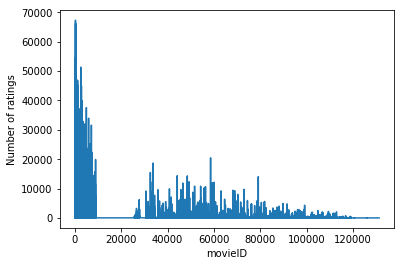

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('movieID')
plt.ylabel('Number of ratings')
plt.plot(df_ratings.groupby('movieId').count()[['rating']].index,df_ratings.groupby('movieId').count()[['rating']].rating)

In [6]:
df_ratings['ratingsCount'] = df_ratings.groupby('movieId').count()[['rating']].rating

In [7]:
df_ratings1 = df_ratings.loc[df_ratings['ratingsCount'] > 1]

In [8]:
df_ratings1

,userId,movieId,rating,timestamp,ratingsCount
1,1,29,3.5,1112484676,49695.0
2,1,32,3.5,1112484819,22243.0
3,1,47,3.5,1112484727,12735.0
4,1,50,3.5,1112484580,2756.0
5,1,112,3.5,1094785740,12161.0
6,1,151,4.0,1094785734,23899.0
7,1,223,4.0,1112485573,12961.0
8,1,253,4.0,1112484940,1415.0
9,1,260,4.0,1112484826,3960.0
10,1,293,4.0,1112484703,29005.0


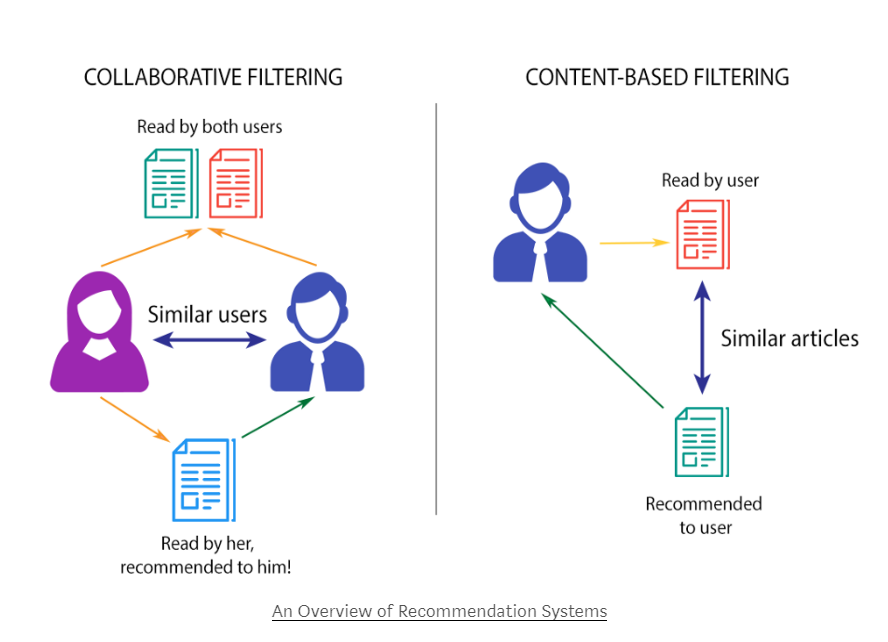

### content / item based collaborative filtering
Content based approach utilizes a series of discrete characteristics of an item in order to recommend additional items with similar properties. In other words, it finds similarities between the items itself

### User based collaborative filtering

Collaborative filtering approach builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.

### Sparse Matrix

A sparse matrix is a matrix that is comprised of mostly zero values.

Sparse matrices are distinct from matrices with mostly non-zero values, which are referred to as dense matrices.



In [9]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_movie_features = df_ratings1.pivot(
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)
# convert dataframe of movie features to scipy sparse matrix
mat_movie_features = csr_matrix(df_movie_features.values)

In [10]:
df_movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,881,882,883,884,885,886,887,889,892,893
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


getting one row from the data / one userid

In [21]:
df_movie_features.iloc[0,:]

userId
1      0.0
2      0.0
3      4.0
4      0.0
5      0.0
6      5.0
7      0.0
8      0.0
9      0.0
10     4.0
11     4.5
12     4.0
13     4.0
14     4.5
15     0.0
16     3.0
17     0.0
18     0.0
19     5.0
20     0.0
21     0.0
22     3.0
23     4.0
24     4.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
      ... 
858    0.0
860    0.0
861    0.0
862    0.0
863    0.0
864    0.0
865    0.0
866    0.0
868    0.0
869    0.0
870    0.0
872    0.0
873    0.0
874    0.0
875    0.0
876    0.0
877    0.0
878    0.0
879    0.0
880    0.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    0.0
889    0.0
892    0.0
893    0.0
Name: 1, Length: 686, dtype: float64

Now our training data has a very high dimensionality. KNN’s performance will suffer from curse of dimensionality if it uses “euclidean distance” in its objective function. Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector (target movie’s features). Instead, we will use cosine similarity for nearest neighbor search.

### Curse of Dimenionsality

Cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse.

This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality.

Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

In [11]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [12]:
model_knn.fit(df_movie_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)

In [14]:
res = model_knn.kneighbors_graph(df_movie_features)

In [16]:
res.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
movie1 = df_movie_features.iloc[0,:].values

In [59]:
movie1 = user1.reshape(1,686)

In [61]:
movie1.shape

(1, 686)

In [63]:
A =model_knn.radius_neighbors(movie1,radius=1.6)

In [67]:
A = model_knn.kneighbors(movie1, n_neighbors =5)

first array is the distance from the current point while the next array is the index of movies who are similar to the current movie

In [68]:
A[1]

array([[   0, 1447,  167,  293, 1009]], dtype=int64)

In [96]:
len(A[0][0])

5

In [94]:
A[0][0]

array([2.22044605e-16, 6.57959998e-01, 6.63682896e-01, 6.74568174e-01,
       6.85818937e-01])

In [49]:
df_movies.loc[1,'title']

'Jumanji (1995)'

Below is how to get the movieId from the title itself

In [56]:
df_movies.loc[df_movies.title == 'Jumanji (1995)', 'movieId'].iloc[0]

2

In [105]:
def find_recommendations(title, n):
    #retrieving the id based on the title
    movieid = df_movies.loc[df_movies.title == title, 'movieId'].iloc[0]
    
    # getting the row of values from the movie_features matrix
    movie1 = df_movie_features.iloc[movieid,:].values
    
    # reshaping the matrix to put into the nearestNeighbors model
    movie1 = movie1.reshape(1,686)
    
    A = model_knn.kneighbors(movie1, n_neighbors =n)
    for ele in A[1]:
        print(df_movies.loc[ele,'title'])

In [106]:
find_recommendations('Jumanji (1995)',4)

2                    Grumpier Old Men (1995)
6                             Sabrina (1995)
212    Before the Rain (Pred dozhdot) (1994)
53                     Big Green, The (1995)
Name: title, dtype: object


In [78]:
find_recommendations('GoldenEye (1995)',5)

10      American President, The (1995)
1482                    Nowhere (1997)
169                     Jeffrey (1995)
1023         That Thing You Do! (1996)
413                   Barcelona (1994)
Name: title, dtype: object


In [85]:
find_recommendations('Casino (1995)',3)

16     Sense and Sensibility (1995)
507             Program, The (1993)
616         Modern Affair, A (1995)
Name: title, dtype: object


### Disadvantages of the recommender system

1) Recency Bias/ Popularity Bias

The recommender tends to only recommend items that are popular within a time frame even though it may not be tailored to 
a person's liking or their features

2) Long tail left out

Often, the high frequency movies are not even the ones that needs recommnedations and profits are often thin for these movies. Yet the recommender system does not really recommend less popular movies since the iteractions are way too less to recommend it to others